In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Inline mode
%matplotlib inline
import matplotlib.pyplot as plt

# Hello Capstone!
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
# Import the Seattle Accident dataset
df = pd.read_csv('Data-Collisions.csv', low_memory = False)

# Show an overview
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
# Correct data types. First, show all the data types
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
# Data types are correct. Now, preprocess all datas
# First, derive the severity target variable by analyze the distribution of all datas
def get_replace_dict(ax, length):
    ''' Convenient function to gain the replace dictionary based on an index of data frame '''
    # Sort the array
    sarr = sorted(ax.value_counts().to_dict().items())
    
    # Obtain the threshold
    threshold = sum([a[1] for a in sarr]) / length
    
    # Keep adding values and split when reach the length
    ret = dict() # Returning dictionary
    cnt = 0 # Running counter
    temp_sum = 0 # Running sum
    for key, value in sarr:
        temp_sum += value
        ret[key] = cnt
        if temp_sum >= threshold:
            cnt += 1
            temp_sum = 0
    return ret

# Test
df['PERSONCOUNT'].replace(get_replace_dict(df['PERSONCOUNT'], 10)).value_counts()

0    132929
1     35553
2     21244
3      4947
Name: PERSONCOUNT, dtype: int64

In [5]:
# Now, preprocess the PERSONCOUNT, VEHCOUNT, PEDCOUNT and PEDCYLCOUNT
df['PERSONCOUNT'].replace(get_replace_dict(df['PERSONCOUNT'], 10), inplace = True)
df['VEHCOUNT'].replace(get_replace_dict(df['VEHCOUNT'], 20), inplace = True)
df['PEDCOUNT'].replace(get_replace_dict(df['PEDCOUNT'], 30), inplace = True)
df['PEDCYLCOUNT'].replace(get_replace_dict(df['PEDCYLCOUNT'], 30), inplace = True)

# Simply map severity code (1-2) to 0-1
df['SEVERITYCODE'].replace({1: 2, 0: 1}, inplace = True)

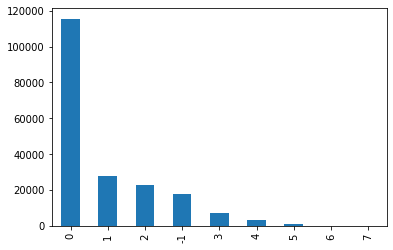

In [9]:
# From the report: sum up the five variable to obtain the severity (-3 for uniformize)
severity_array = df['SEVERITYCODE'] + df['PERSONCOUNT'] + df['VEHCOUNT'] + df['PEDCOUNT'] + df['PEDCYLCOUNT'] - 3

# Obtain a bar chart of the array
severity_array.value_counts().plot(kind = 'bar')
plt.savefig('images/severity_array_value.png')